In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv("C:/Users/rodri/OneDrive/Documentos/Projeto final/Properties1.csv")

In [28]:
df.head()

,id,property_name,avg_price_per_night,guests,bedrooms,beds,baths,reviews,Rating,Ocupação,Receita Bruta
0,7158567,Brand new condo with amazing view!!,119.0,6.00,2.0,2.0,2.0,71.0,5.0,0.73,31490.38
1,10549074,Private 2 bedroom Apartment in POOL home,49.0,4.00,2.0,2.0,1.0,161.0,5.0,0.79,14144.05
2,20000007,MyRental Property 41,129.0,4.00,2.0,2.0,2.0,39.0,5.0,0.80,37511.05
3,6629005,"Fantasy World 2br, Universal Studio",110.0,6.00,2.0,3.0,2.0,201.0,5.0,0.79,31718.50
4,29000584,Fantasy World Resort - Disney / Universal Studios,118.0,6.00,2.0,3.0,2.0,8.0,5.0,0.80,34635.46


<Axes: xlabel='bedrooms', ylabel='avg_price_per_night'>

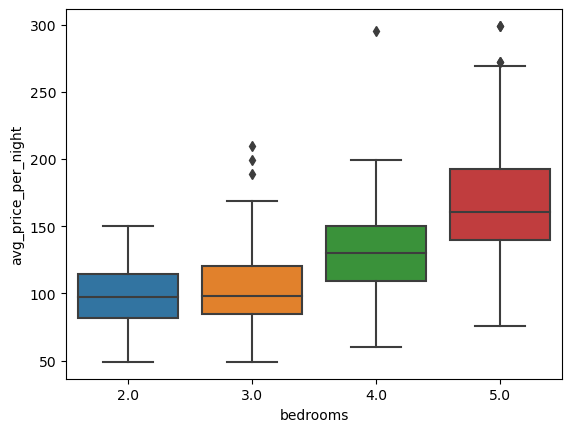

In [49]:
sns.boxplot(data=df,y=df.avg_price_per_night,x=df.bedrooms)

<Axes: xlabel='bedrooms', ylabel='Ocupação'>

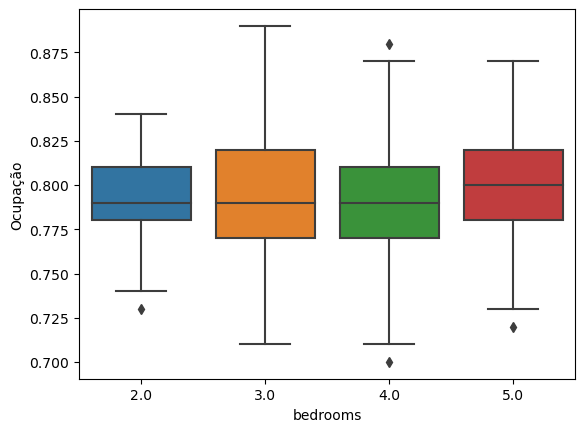

In [50]:
sns.boxplot(data=df,y=df.Ocupação,x=df.bedrooms)

<Axes: xlabel='reviews', ylabel='Ocupação'>

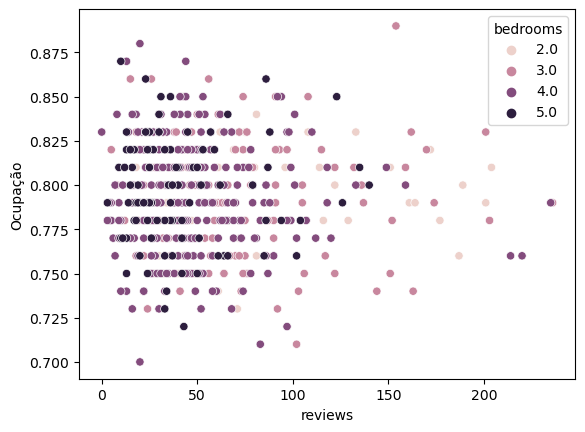

In [60]:
sns.scatterplot(data=df,x=df.reviews,y=df.Ocupação,hue=df.bedrooms)

In [130]:
df['property_name'] = df['property_name'].astype(str)

In [131]:
palavras = df['property_name'].str.split(expand=True).unstack()

In [72]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rodri\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [132]:
stop_words = set(stopwords.words('english'))
palavras = palavras[~palavras.isin(stop_words)]
palavras.fillna('')

0   0         Brand
    1       Private
    2      MyRental
    3       Fantasy
    4       Fantasy
             ...   
13  528            
    529            
    530            
    531            
    532            
Length: 7210, dtype: object

In [133]:
word_freq = palavras.value_counts().to_frame(name='frequencia')

In [134]:
word_freq = word_freq.sort_values(by='frequencia', ascending=False)

In [135]:
word_freq.head(50)

,frequencia
Disney,153
Lake,72
-,55
Home,52
4,50
Storey,47
near,47
MyRental,40
5,40
3,40


In [146]:
exclude = ['-','1','2','3','4','5','6','7','8','9','&']

In [148]:
for word in exclude:
    word_freq = word_freq[~word_freq.index.str.contains(word, case=False, na=False)]

In [149]:
word_freq.head(30)

,frequencia
Disney,153
Lake,72
Home,52
Storey,47
near,47
MyRental,40
Property,40
Resort,40
Villa,34
Pool,32


In [151]:
new_df = word_freq.reset_index()

In [153]:
new_df.rename(columns={'index':'descricao'})

,descricao,frequencia
0,Disney,153
1,Lake,72
2,Home,52
3,Storey,47
4,near,47
...,...,...
744,DISNEY!!,1
745,bat,1
746,LOCATION,1
747,fingertips,1


In [169]:
new_df.head(30)

,index,frequencia
0,Disney,153
1,Lake,72
2,Home,52
3,Storey,47
4,near,47
5,MyRental,40
6,Property,40
7,Resort,40
8,Villa,34
9,Pool,32


In [160]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [161]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [163]:
import matplotlib as mpl
%matplotlib inline

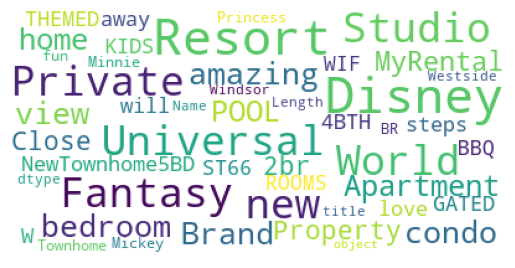

In [168]:
#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)
data = pd.read_csv("C:/Users/rodri/OneDrive/Documentos/Projeto final/names.csv")

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [167]:
data

,Brand new condo with amazing view!!
0,Private 2 bedroom Apartment in POOL home
1,MyRental Property 41
2,"Fantasy World 2br, Universal Studio"
3,Fantasy World Resort - Disney / Universal Studios
4,Fantasy World 2 bed/2 bath - Sea World
...,...
527,Close to Disney!NewTownhome5BD 4BTH W/Private ...
528,Just steps away from Disney...You will love it!
529,"ST66-GATED RESORT, KIDS THEMED ROOMS, BBQ, WIF..."
530,"Mickey, Minnie, Princess and fun"
